# Impport Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Data Preparation and Cleaning

In [2]:
df = pd.read_csv('C:\Machine Learning Projects\Medical_Cost_Prediction\expenses.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nelli\AppData\Local\Temp\ipykernel_1104\1202439627.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('C:\Machine Learning Projects\Medical_Cost_Prediction\expenses.csv')


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
cat_variables = df.select_dtypes(exclude='number').columns
num_variables = df.select_dtypes(exclude='object').columns 
for i in cat_variables: 
    print(df[i].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [9]:
#encode categorical variables 
df_encoded  = pd.get_dummies(df,drop_first=True,dtype=int)

In [10]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

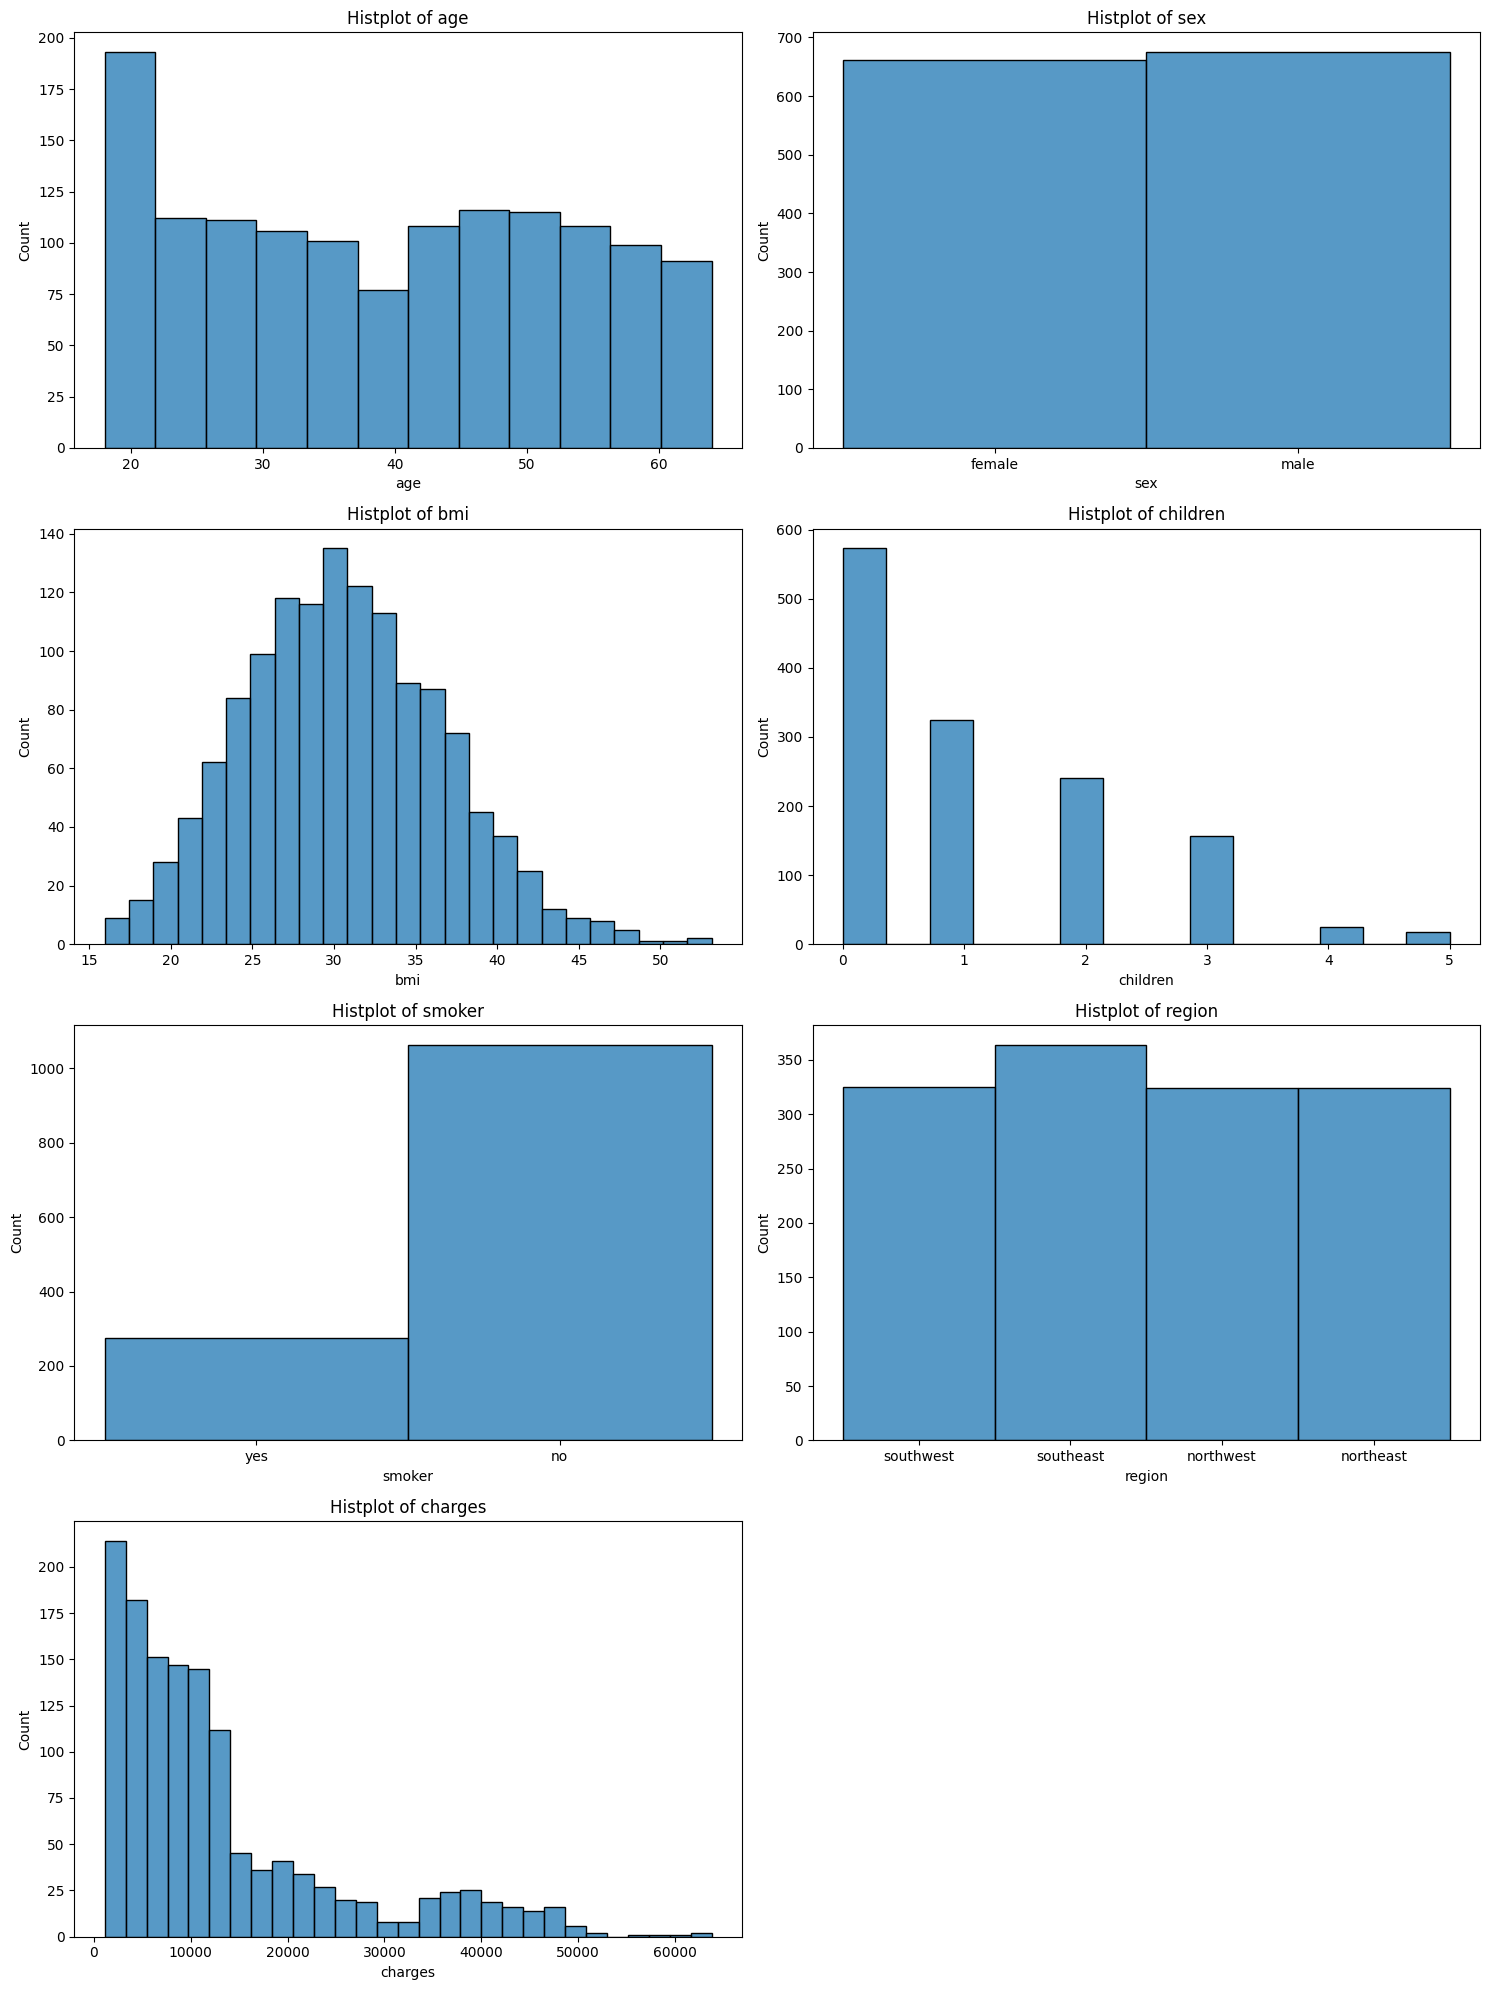

In [12]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(15,5 * num_rows))
for i,col in enumerate(df.columns,1): 
    plt.subplot(num_rows,cols_per_row,i) 
    sns.histplot(data=df,x=col)
    plt.title(f'Histplot of {col}')

plt.tight_layout()
plt.show()

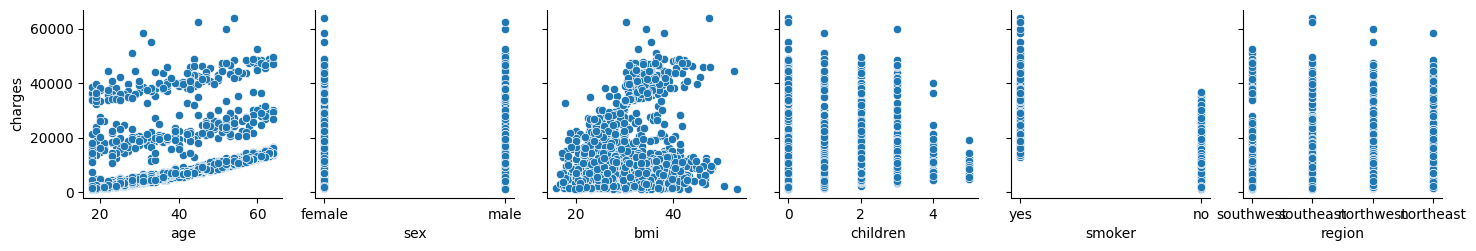

In [13]:
x = df.drop(columns=['charges'])
y = df['charges']
sns.pairplot(df,y_vars=['charges'],x_vars=x.columns)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
cat_variables = df.select_dtypes(exclude='number')
num_variables = df.select_dtypes(exclude='object')
cat_variables,num_variables

(         sex smoker     region
 0     female    yes  southwest
 1       male     no  southeast
 2       male     no  southeast
 3       male     no  northwest
 4       male     no  northwest
 ...      ...    ...        ...
 1333    male     no  northwest
 1334  female     no  northeast
 1335  female     no  southeast
 1336  female     no  southwest
 1337  female    yes  northwest
 
 [1337 rows x 3 columns],
       age     bmi  children      charges
 0      19  27.900         0  16884.92400
 1      18  33.770         1   1725.55230
 2      28  33.000         3   4449.46200
 3      33  22.705         0  21984.47061
 4      32  28.880         0   3866.85520
 ...   ...     ...       ...          ...
 1333   50  30.970         3  10600.54830
 1334   18  31.920         0   2205.98080
 1335   18  36.850         0   1629.83350
 1336   21  25.800         0   2007.94500
 1337   61  29.070         0  29141.36030
 
 [1337 rows x 4 columns])

In [16]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42) 
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = np.log1p(df_train.charges.values)
y_test = np.log1p(df_test.charges.values)
y_val = np.log1p(df_val.charges.values)

x_train = df_train.drop(columns=['charges'])
x_test = df_test.drop(columns=['charges'])
x_val = df_val.drop(columns=['charges'])

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)



In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42) 
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = np.log1p(df_train.charges.values)
y_test = np.log1p(df_test.charges.values)
y_val = np.log1p(df_val.charges.values)

x_train = df_train.drop(columns=['charges'])
x_test = df_test.drop(columns=['charges'])
x_val = df_val.drop(columns=['charges'])

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

rf = RandomForestRegressor(n_estimators=10,
                          max_depth=5,
                          random_state=42,
                          n_jobs=-1)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_val)

mse = mean_squared_error(y_val,y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error {rmse}')

medical_values = {'age': 20,
 'sex': 'male',
 'bmi': 27.3,
 'children': 0,
 'smoker': 'yes',
 'region': 'southwest'}
x = dv.transform([medical_values])

# Make the prediction
prediction = rf.predict(x)

# Print the predicted medical cost
print(y_pred[0])

Root Mean Squared Error 0.3632793468772234
9.78250321267193


In [18]:
train_dicts[0]

{'age': 20,
 'sex': 'male',
 'bmi': 27.3,
 'children': 0,
 'smoker': 'yes',
 'region': 'southwest'}

In [19]:
medical_values = {'age': 19,
 'sex': 'female',
 'bmi': 27.9,
 'children': 0,
 'smoker': 'yes',
 'region': 'southwest'}
x = dv.transform([medical_values])

# Make the prediction
prediction = rf.predict(x)

# Print the predicted medical cost
print(f'Predicted medical cost: {np.expm1(prediction[0])}')

Predicted medical cost: 17719.95670227308


In [20]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [21]:
print(f'Predicted medical cost: {np.expm1(prediction[0])}')  # Use expm1 to reverse log1p

Predicted medical cost: 17719.95670227308


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.21019092566775247
R-squared: 0.8347176885696683
